In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [3]:
company_info = pd.read_csv(r'C:\Users\yoon9\Documents\GitHub\numble_repo\data\company_info_final.csv',encoding='cp949')

In [4]:
company_info

,사업자등록번호,기업명,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,산업코드1,공공기관유형,중견기업보호여부,본점기업코드,설립일자,설립구분,국가명,직원수,폐업여부,산업코드 대분류,구글 검색량,설립일자(day)
0,1138111739,한일가스산업,2,1,1,0,0,0,47,0,0,0,1966-04-19 00:00:00,1,0,43.0,0,도매 및 소매업,67500.0,20650
1,2078132193,엠피아이,2,1,1,0,0,0,15,0,0,0,1991-08-06 00:00:00,1,0,35.0,0,제조업,2890000.0,11410
2,1318167565,도영운수,2,1,1,0,0,0,49,0,0,0,2001-10-30 00:00:00,1,0,149.0,0,운수 및 창고업,484.0,7672
3,5048128251,중원산업,2,1,1,0,0,0,30,0,0,0,1999-01-12 00:00:00,1,0,75.0,0,제조업,82300.0,8694
4,1098164260,카타나골프,2,1,1,0,0,0,46,0,0,0,2000-05-31 00:00:00,1,0,3.0,0,도매 및 소매업,310.0,8189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,2,1,2,0,0,0,10,0,0,1,2018-01-26 00:00:00,1,0,0.0,1,제조업,8.0,1740
35717,8018501578,우진푸드중부지점,2,1,2,0,0,0,10,0,0,1,2020-07-27 00:00:00,1,0,22.0,1,제조업,19.0,827
35718,4118523419,윤월드푸드코리아다크써클브로스,2,1,2,0,0,0,56,0,0,1,2019-09-26 00:00:00,1,0,0.0,1,숙박 및 음식점업,0.0,1132
35719,1738102533,기린테크,2,1,1,0,0,0,58,0,0,0,2021-10-25 00:00:00,1,0,0.0,1,정보통신업,119000.0,372


# Feature Engineering

In [5]:
df = company_info.drop(columns=['사업자등록번호','기업명','설립일자','산업코드1','공기업구분'])

In [6]:
df.columns

Index(['개인법인구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '공공기관유형', '중견기업보호여부',
       '본점기업코드', '설립구분', '국가명', '직원수', '폐업여부', '산업코드 대분류', '구글 검색량',
       '설립일자(day)'],
      dtype='object')

## 스케일링 인코딩 진행

In [12]:
from sklearn.preprocessing import StandardScaler # 스케일링 라이브러리
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [8]:
company_info

,사업자등록번호,기업명,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,산업코드1,공공기관유형,중견기업보호여부,본점기업코드,설립일자,설립구분,국가명,직원수,폐업여부,산업코드 대분류,구글 검색량,설립일자(day)
0,1138111739,한일가스산업,2,1,1,0,0,0,47,0,0,0,1966-04-19 00:00:00,1,0,43.0,0,도매 및 소매업,67500.0,20650
1,2078132193,엠피아이,2,1,1,0,0,0,15,0,0,0,1991-08-06 00:00:00,1,0,35.0,0,제조업,2890000.0,11410
2,1318167565,도영운수,2,1,1,0,0,0,49,0,0,0,2001-10-30 00:00:00,1,0,149.0,0,운수 및 창고업,484.0,7672
3,5048128251,중원산업,2,1,1,0,0,0,30,0,0,0,1999-01-12 00:00:00,1,0,75.0,0,제조업,82300.0,8694
4,1098164260,카타나골프,2,1,1,0,0,0,46,0,0,0,2000-05-31 00:00:00,1,0,3.0,0,도매 및 소매업,310.0,8189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,2,1,2,0,0,0,10,0,0,1,2018-01-26 00:00:00,1,0,0.0,1,제조업,8.0,1740
35717,8018501578,우진푸드중부지점,2,1,2,0,0,0,10,0,0,1,2020-07-27 00:00:00,1,0,22.0,1,제조업,19.0,827
35718,4118523419,윤월드푸드코리아다크써클브로스,2,1,2,0,0,0,56,0,0,1,2019-09-26 00:00:00,1,0,0.0,1,숙박 및 음식점업,0.0,1132
35719,1738102533,기린테크,2,1,1,0,0,0,58,0,0,0,2021-10-25 00:00:00,1,0,0.0,1,정보통신업,119000.0,372


In [9]:
num_attribss = df[['직원수','설립일자(day)','구글 검색량']]
cat_1hot_attribs = df[['산업코드 대분류']]
cat_ord_attribs = df[['상장코드','벤처기업여부','공공기관유형', '중견기업보호여부','국가명','국외투자법인여부','개인법인구분','본점지점구분','본점기업코드','설립구분']]
y = company_info[['폐업여부']]

cat_all = df[['산업코드 대분류','상장코드','벤처기업여부','공공기관유형', '중견기업보호여부','국가명','국외투자법인여부','본점지점구분','본점기업코드','설립구분']]
# 변수별 타입 나누기

In [10]:
cat_all.dtypes

산업코드 대분류    object
상장코드         int64
벤처기업여부       int64
공공기관유형       int64
중견기업보호여부     int64
국가명          int64
국외투자법인여부     int64
본점지점구분       int64
본점기업코드       int64
설립구분         int64
dtype: object

## 스케일링

### StandardScaler

In [11]:
# 수치형 변수 스케일링
sta_scaler = StandardScaler()
sta_X_scale = sta_scaler.fit_transform(num_attribss)
sta_X_scale = pd.DataFrame(sta_X_scale, columns=num_attribss.columns)
sta_X_scale  # 스케일링 데이터 프레임화

,직원수,설립일자(day),구글 검색량
0,-0.071824,3.515949,-0.045666
1,-0.123865,1.242839,0.033135
2,0.617721,0.323263,-0.047537
3,0.136341,0.574683,-0.045253
4,-0.332029,0.450449,-0.047542
...,...,...,...
35716,-0.351545,-1.136054,-0.047550
35717,-0.208432,-1.360659,-0.047550
35718,-0.351545,-1.285626,-0.047550
35719,-0.351545,-1.472592,-0.044228


# MinMaxScaler

In [12]:
MM_scaler = MinMaxScaler()
MM_X_scale = MM_scaler.fit_transform(num_attribss)
MM_X_scale = pd.DataFrame(MM_X_scale, columns=num_attribss.columns)
MM_X_scale  # 스케일링 데이터 프레임화

,직원수,설립일자(day),구글 검색량
0,0.002636,0.414897,1.917614e-05
1,0.002146,0.228227,8.210227e-04
2,0.009135,0.152710,1.375000e-07
3,0.004598,0.173357,2.338068e-05
4,0.000184,0.163155,8.806818e-08
...,...,...,...
35716,0.000000,0.032869,2.272727e-09
35717,0.001349,0.014425,5.397727e-09
35718,0.000000,0.020586,0.000000e+00
35719,0.000000,0.005232,3.380682e-05


## 원핫인코딩

In [13]:
# 원핫인코딩 함수 적용
hot1_encoder = OneHotEncoder(sparse=False,drop='if_binary')
X_1hot = hot1_encoder.fit_transform(cat_1hot_attribs)
X_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
X_1hot = pd.DataFrame(X_1hot, columns=hot1_encoder.get_feature_names()) #순서가 없는 카테고리형
# 데이터 프레임화

C:\Users\yoon9\anaconda3\envs\numble_repo\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
X_1hot

,x0_건설업,"x0_공공 행정, 국방 및 사회보장 행정",x0_광업,x0_교육 서비스업,x0_금융 및 보험업,"x0_농업,임업 및 어업",x0_도매 및 소매업,x0_보건업 및 사회복지 서비스업,x0_부동산업,"x0_사업시설 관리, 사업 지원 및 임대 서비스업","x0_수도, 하수 및 폐기물 처리, 원료 재생업",x0_숙박 및 음식점업,"x0_예술, 스포츠 및 여가관련 서비스업",x0_운수 및 창고업,"x0_전기,가스,증기 및 공기 조절 공급업","x0_전문, 과학 및 기술 서비스업",x0_정보통신업,x0_제조업,x0_협회 및 단체
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Oridinal Encoding

In [16]:
ord_encoder = OrdinalEncoder() #순서가 있는 카테고리형
X_ord = ord_encoder.fit_transform(cat_ord_attribs['벤처기업여부'].values.reshape(-1,1))
X_ord = pd.DataFrame(X_ord, columns= ['벤처기업여부'])
X_ord

,벤처기업여부
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
35716,0.0
35717,0.0
35718,0.0
35719,0.0


## Label Encoding

In [59]:
cat_all['산업코드 대분류']

0         6
1        17
2        13
3        17
4         6
         ..
35716    17
35717    17
35718    11
35719    16
35720    17
Name: 산업코드 대분류, Length: 35721, dtype: int32

In [60]:
X_label = cat_all.copy()

In [61]:
lab_encoder = LabelEncoder()  #순서가 있는 카테고리형

In [62]:
for name in cat_all.columns:
    X_label[name] = lab_encoder.fit_transform(cat_all[name])

In [64]:
X_label

,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,본점기업코드,설립구분
0,6,0,0,0,0,0,0,0,0,0
1,17,0,0,0,0,0,0,0,0,0
2,13,0,0,0,0,0,0,0,0,0
3,17,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35716,17,0,0,0,0,0,0,1,1,0
35717,17,0,0,0,0,0,0,1,1,0
35718,11,0,0,0,0,0,0,1,1,0
35719,16,0,0,0,0,0,0,0,0,0


# Scaler + encoder 데이터 프레임 합치기

In [21]:
df_preprdcessed_sta = pd.concat([sta_X_scale, X_1hot, X_ord], axis = 1)
df_preprdcessed_sta
# Standard Scaler + One Hot + Ordinal

,직원수,설립일자(day),구글 검색량,x0_건설업,"x0_공공 행정, 국방 및 사회보장 행정",x0_광업,x0_교육 서비스업,x0_금융 및 보험업,"x0_농업,임업 및 어업",x0_도매 및 소매업,...,"x0_수도, 하수 및 폐기물 처리, 원료 재생업",x0_숙박 및 음식점업,"x0_예술, 스포츠 및 여가관련 서비스업",x0_운수 및 창고업,"x0_전기,가스,증기 및 공기 조절 공급업","x0_전문, 과학 및 기술 서비스업",x0_정보통신업,x0_제조업,x0_협회 및 단체,벤처기업여부
0,-0.071824,3.515949,-0.045666,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.123865,1.242839,0.033135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.617721,0.323263,-0.047537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.136341,0.574683,-0.045253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.332029,0.450449,-0.047542,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,-0.351545,-1.136054,-0.047550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35717,-0.208432,-1.360659,-0.047550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35718,-0.351545,-1.285626,-0.047550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35719,-0.351545,-1.472592,-0.044228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
df_preprdcessed_MM = pd.concat([MM_X_scale, X_1hot, X_ord], axis = 1)
df_preprdcessed_MM
#Min Max Scaler + One Hot + Ordinal

,직원수,설립일자(day),구글 검색량,x0_건설업,"x0_공공 행정, 국방 및 사회보장 행정",x0_광업,x0_교육 서비스업,x0_금융 및 보험업,"x0_농업,임업 및 어업",x0_도매 및 소매업,...,"x0_수도, 하수 및 폐기물 처리, 원료 재생업",x0_숙박 및 음식점업,"x0_예술, 스포츠 및 여가관련 서비스업",x0_운수 및 창고업,"x0_전기,가스,증기 및 공기 조절 공급업","x0_전문, 과학 및 기술 서비스업",x0_정보통신업,x0_제조업,x0_협회 및 단체,벤처기업여부
0,0.002636,0.414897,1.917614e-05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002146,0.228227,8.210227e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.009135,0.152710,1.375000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.004598,0.173357,2.338068e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000184,0.163155,8.806818e-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,0.000000,0.032869,2.272727e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35717,0.001349,0.014425,5.397727e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35718,0.000000,0.020586,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35719,0.000000,0.005232,3.380682e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
df_preprdcessed_sta_label = pd.concat([sta_X_scale, X_label], axis = 1)
df_preprdcessed_sta_label

# Standard scaler + Label encoding

,직원수,설립일자(day),구글 검색량,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,본점기업코드,설립구분
0,-0.071824,3.515949,-0.045666,6,0,0,0,0,0,0,1,0,0
1,-0.123865,1.242839,0.033135,17,0,0,0,0,0,0,1,0,0
2,0.617721,0.323263,-0.047537,13,0,0,0,0,0,0,1,0,0
3,0.136341,0.574683,-0.045253,17,0,0,0,0,0,0,1,0,0
4,-0.332029,0.450449,-0.047542,6,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,-0.351545,-1.136054,-0.047550,17,0,0,0,0,0,0,2,1,0
35717,-0.208432,-1.360659,-0.047550,17,0,0,0,0,0,0,2,1,0
35718,-0.351545,-1.285626,-0.047550,11,0,0,0,0,0,0,2,1,0
35719,-0.351545,-1.472592,-0.044228,16,0,0,0,0,0,0,1,0,0


In [65]:
df_preprdcessed_mm_label = pd.concat([MM_X_scale, X_label], axis = 1)
df_preprdcessed_mm_label

,직원수,설립일자(day),구글 검색량,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,본점기업코드,설립구분
0,0.002636,0.414897,1.917614e-05,6,0,0,0,0,0,0,0,0,0
1,0.002146,0.228227,8.210227e-04,17,0,0,0,0,0,0,0,0,0
2,0.009135,0.152710,1.375000e-07,13,0,0,0,0,0,0,0,0,0
3,0.004598,0.173357,2.338068e-05,17,0,0,0,0,0,0,0,0,0
4,0.000184,0.163155,8.806818e-08,6,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,0.000000,0.032869,2.272727e-09,17,0,0,0,0,0,0,1,1,0
35717,0.001349,0.014425,5.397727e-09,17,0,0,0,0,0,0,1,1,0
35718,0.000000,0.020586,0.000000e+00,11,0,0,0,0,0,0,1,1,0
35719,0.000000,0.005232,3.380682e-05,16,0,0,0,0,0,0,0,0,0


## 모델 평가 함수

In [21]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
def model_eval(pred, answer):
    print(f'accuracy_score : {accuracy_score(pred,answer)}')
    print(f'recall_score : {recall_score(pred,answer)}')
    print(f'precision_score : {precision_score(pred,answer)}')
    print(f'f1_score : {f1_score(pred,answer)}')
    print(f'coufusion_matrix : ')
    print(confusion_matrix(pred,answer))

# Standard Scaler + One Hot + Ordinal Random Forest

In [24]:
X = df_preprdcessed_sta

In [25]:
X.shape, y.shape

((35721, 23), (35721, 1))

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((28576, 23), (7145, 23), (28576, 1), (7145, 1))

In [29]:
y.value_counts()

폐업여부
0       28982
1        6739
dtype: int64

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
RFC_sta = RandomForestClassifier(max_depth=10,n_estimators=100)

In [34]:
RFC_sta.fit(X_train,y_train)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_3112\1307098183.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_sta.fit(X_train,y_train)


RandomForestClassifier(max_depth=10)

In [35]:
X_train_predicted = RFC_sta.predict(X_train)

In [36]:
X_val_predicted = RFC_sta.predict(X_val)

In [37]:
model_eval(X_train_predicted,y_train)

accuracy_score : 0.9097844344904815
recall_score : 0.9512351620147578
precision_score : 0.5499907252828788
f1_score : 0.6969910672308416
coufusion_matrix : 
[[23033  2426]
 [  152  2965]]


In [38]:
model_eval(X_val_predicted,y_val)

accuracy_score : 0.8975507347795662
recall_score : 0.9106666666666666
precision_score : 0.5066765578635015
f1_score : 0.6510962821734986
coufusion_matrix : 
[[5730  665]
 [  67  683]]


# Minmax Scaler + One Hot + Ordinal Random Forest

In [39]:
X_MM = df_preprdcessed_sta_label

In [40]:
y

,폐업여부
0,0
1,0
2,0
3,0
4,0
...,...
35716,1
35717,1
35718,1
35719,1


In [41]:
X_train_MM, X_val_MM, y_train_MM, y_val_MM = train_test_split(X_MM, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train_MM.shape, X_val_MM.shape, y_train_MM.shape, y_val_MM.shape

((28576, 13), (7145, 13), (28576, 1), (7145, 1))

In [42]:
RFC_MM = RandomForestClassifier()

In [43]:
RFC_MM.fit(X_train_MM,y_train_MM)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_3112\3340015268.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_MM.fit(X_train_MM,y_train_MM)


RandomForestClassifier()

In [44]:
X_train_predicted_MM = RFC_MM.predict(X_train_MM)

In [45]:
X_val_predicted_MM = RFC_MM.predict(X_val_MM)

In [46]:
model_eval(X_train_predicted_MM,y_train_MM)

accuracy_score : 0.9935960246360582
recall_score : 0.9982778415614236
precision_score : 0.9677239844184753
f1_score : 0.982763492512009
coufusion_matrix : 
[[23176   174]
 [    9  5217]]


In [47]:
model_eval(X_val_predicted_MM,y_val_MM)

accuracy_score : 0.9275017494751574
recall_score : 0.8900375939849624
precision_score : 0.7025222551928784
f1_score : 0.7852404643449419
coufusion_matrix : 
[[5680  401]
 [ 117  947]]


MinMax 를 사용하자 성능이 더 향상되었다.

## Standard Scaler + Label encoding Random Forest

In [48]:
X_sl = df_preprdcessed_sta_label

In [49]:
y

,폐업여부
0,0
1,0
2,0
3,0
4,0
...,...
35716,1
35717,1
35718,1
35719,1


In [50]:
X_train_sl, X_val_sl, y_train_sl, y_val_sl = train_test_split(X_sl, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train_sl.shape, X_val_sl.shape, y_train_sl.shape, y_val_sl.shape

((28576, 13), (7145, 13), (28576, 1), (7145, 1))

In [51]:
RFC_sl = RandomForestClassifier()

In [52]:
RFC_sl.fit(X_train_sl,y_train_sl)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_3112\1300462302.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_sl.fit(X_train_sl,y_train_sl)


RandomForestClassifier()

In [53]:
X_train_predicted_sl = RFC_sl.predict(X_train_sl)

In [54]:
X_val_predicted_sl = RFC_sl.predict(X_val_sl)

In [55]:
model_eval(X_train_predicted_sl,y_train_sl)

accuracy_score : 0.9933510638297872
recall_score : 0.9982755317110558
precision_score : 0.9664255240215174
f1_score : 0.9820923656927427
coufusion_matrix : 
[[23176   181]
 [    9  5210]]


In [56]:
model_eval(X_val_predicted_sl,y_val_sl)

accuracy_score : 0.9286214135759272
recall_score : 0.896780303030303
precision_score : 0.7025222551928784
f1_score : 0.7878535773710483
coufusion_matrix : 
[[5688  401]
 [ 109  947]]


# Minmax scaler + labelencoding

In [74]:
X_mml = df_preprdcessed_mm_label

In [75]:
y

,폐업여부
0,0
1,0
2,0
3,0
4,0
...,...
35716,1
35717,1
35718,1
35719,1


In [76]:
X_train_mml, X_val_mml, y_train_mml, y_val_mml = train_test_split(X_mml, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train_mml.shape, X_val_mml.shape, y_train_mml.shape, y_val_mml.shape

((28576, 13), (7145, 13), (28576, 1), (7145, 1))

In [77]:
RFC_mml = RandomForestClassifier()

In [78]:
RFC_mml.fit(X_train_mml,y_train_mml)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_3112\1687393012.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_mml.fit(X_train_mml,y_train_mml)


RandomForestClassifier()

In [81]:
X_train_predicted_mml = RFC_sl.predict(X_train_mml)

In [82]:
X_val_predicted_mml = RFC_sl.predict(X_val_mml)

In [83]:
model_eval(X_train_predicted_mml,y_train_mml)

accuracy_score : 0.8113451847704367
recall_score : 0.0
precision_score : 0.0
f1_score : 0.0
coufusion_matrix : 
[[23185  5391]
 [    0     0]]


C:\Users\yoon9\anaconda3\envs\numble_repo\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
model_eval(X_val_predicted_mml,y_val_mml)

accuracy_score : 0.8113365990202939
recall_score : 0.0
precision_score : 0.0
f1_score : 0.0
coufusion_matrix : 
[[5797 1348]
 [   0    0]]


C:\Users\yoon9\anaconda3\envs\numble_repo\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
RFC_mml.feature_importances_

array([0.22361477, 0.30268493, 0.2676889 , 0.14859066, 0.00307057,
       0.0077848 , 0.00030456, 0.00156874, 0.00401269, 0.00286722,
       0.01465407, 0.01116182, 0.01199628])

# Corp 데이터 Test

In [47]:
df_corp = pd.read_csv(r'C:\Users\yoon9\Documents\GitHub\numble_repo\data\company_info_final+corp.csv',encoding='cp949')

In [48]:
corp = df_corp.drop(columns=['개인법인구분','사업자등록번호','기업명','설립일자','산업코드1','공기업구분','회사명','재무정보_분기'])
corp.columns

Index(['본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '공공기관유형', '중견기업보호여부', '본점기업코드',
       '설립구분', '국가명', '직원수', '폐업여부', '산업코드 대분류', '구글 검색량', '설립일자(day)',
       'sum_rlt'],
      dtype='object')

In [24]:
num_attribss_corp = corp[['직원수', '설립일자(day)', '구글 검색량','sum_rlt']]
y_corp = corp[['폐업여부']]

cat_all_corp = corp[['산업코드 대분류', '상장코드', '벤처기업여부', '공공기관유형', '중견기업보호여부', '국가명', '국외투자법인여부', '본점지점구분', '본점기업코드', '설립구분']]
# 변수별 타입 나누기

In [25]:
# 수치형 변수 스케일링
sta_scaler_corp = StandardScaler()
sta_X_scale_corp = sta_scaler_corp.fit_transform(num_attribss_corp)
sta_X_scale_corp = pd.DataFrame(sta_X_scale_corp, columns=num_attribss_corp.columns)
sta_X_scale_corp  # 스케일링 데이터 프레임화

,직원수,설립일자(day),구글 검색량,sum_rlt
0,-0.205197,2.956620,-0.044673,-0.698681
1,-0.455081,0.057207,-0.046443,-0.274808
2,-0.455081,0.057207,-0.046443,-0.168840
3,-0.248926,0.389938,-0.046448,-0.698681
4,-0.248926,0.389938,-0.046448,-0.380777
...,...,...,...,...
11559,-0.473823,-1.515005,-0.046227,-0.274808
11560,-0.448834,-1.538739,-0.046227,4.917637
11561,-0.473823,-1.558982,-0.046227,-0.274808
11562,-0.473823,-1.558982,-0.046227,0.890843


In [26]:
X_label_corp = cat_all_corp.copy()
lab_encoder_corp = LabelEncoder()  #순서가 있는 카테고리형
for name in cat_all_corp.columns:
    X_label_corp[name] = lab_encoder_corp.fit_transform(cat_all_corp[name])
X_label_corp

,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,본점기업코드,설립구분
0,5,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11559,16,0,0,0,0,0,0,0,0,0
11560,0,0,0,0,0,0,0,0,0,0
11561,5,0,0,0,0,0,0,1,1,0
11562,5,0,0,0,0,0,0,1,1,0


In [27]:
df_preprdcessed_corp = pd.concat([sta_X_scale_corp, X_label_corp], axis = 1)
df_preprdcessed_corp

,직원수,설립일자(day),구글 검색량,sum_rlt,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,본점기업코드,설립구분
0,-0.205197,2.956620,-0.044673,-0.698681,5,0,0,0,0,0,0,0,0,0
1,-0.455081,0.057207,-0.046443,-0.274808,5,0,0,0,0,0,0,0,0,0
2,-0.455081,0.057207,-0.046443,-0.168840,5,0,0,0,0,0,0,0,0,0
3,-0.248926,0.389938,-0.046448,-0.698681,5,0,0,0,0,0,0,0,0,0
4,-0.248926,0.389938,-0.046448,-0.380777,5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11559,-0.473823,-1.515005,-0.046227,-0.274808,16,0,0,0,0,0,0,0,0,0
11560,-0.448834,-1.538739,-0.046227,4.917637,0,0,0,0,0,0,0,0,0,0
11561,-0.473823,-1.558982,-0.046227,-0.274808,5,0,0,0,0,0,0,1,1,0
11562,-0.473823,-1.558982,-0.046227,0.890843,5,0,0,0,0,0,0,1,1,0


In [34]:
X_train_corp, X_val_corp, y_train_corp, y_val_corp = train_test_split(df_preprdcessed_corp, y_corp, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train_corp.shape, X_val_corp.shape, y_train_corp.shape, y_val_corp.shape

((9251, 14), (2313, 14), (9251, 1), (2313, 1))

In [35]:
RFC_corp = RandomForestClassifier()

In [36]:
RFC_corp.fit(X_train_corp,y_train_corp)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_20792\1102302271.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_corp.fit(X_train_corp,y_train_corp)


RandomForestClassifier()

In [37]:
X_train_predicted_corp = RFC_corp.predict(X_train_corp)

In [38]:
X_val_predicted_corp = RFC_corp.predict(X_val_corp)

In [39]:
model_eval(X_train_predicted_corp,y_train_corp)

accuracy_score : 0.9998919035779915
recall_score : 1.0
precision_score : 0.9984732824427481
f1_score : 0.9992360580595876
coufusion_matrix : 
[[8596    1]
 [   0  654]]


In [41]:
model_eval(X_val_predicted_corp,y_val_corp)

accuracy_score : 0.9788153912667531
recall_score : 0.896551724137931
precision_score : 0.7926829268292683
f1_score : 0.8414239482200647
coufusion_matrix : 
[[2134   34]
 [  15  130]]


In [42]:
RFC_corp.feature_importances_

array([1.49696168e-01, 1.59954355e-01, 3.02511119e-01, 2.16131661e-01,
       7.61718579e-02, 6.84856716e-03, 7.97494027e-03, 7.14129129e-05,
       1.47047653e-03, 6.54133433e-03, 4.49088448e-03, 2.76823617e-02,
       3.26963705e-02, 7.75849131e-03])

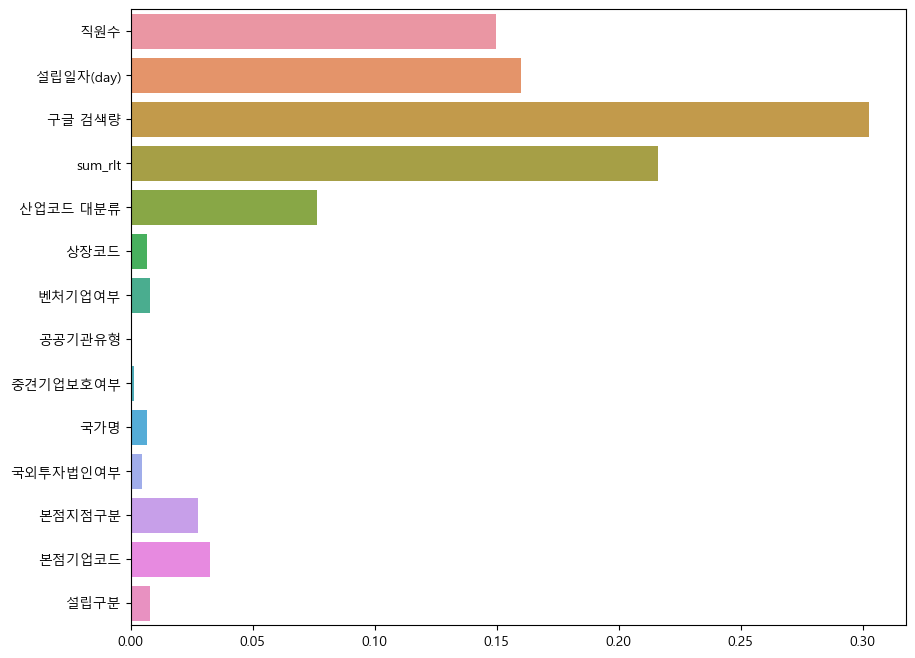

In [44]:
plt.figure(figsize= (10,8))  # 피쳐의 중요도, 가중치 시각화
sns.barplot(y = X_train_corp.columns, x =RFC_corp.feature_importances_)
plt.show()

In [65]:
df_sum_rlf_std =  df_corp.groupby('기업명')['sum_rlt'].std()

In [68]:
df_sum_rlf_std = pd.DataFrame(df_sum_rlf_std)

In [70]:
df_sum_rlf_std

,sum_rlt
기업명,
153로지스틱스,4.760952
가겐투안,3.559026
가나문화콘텐츠,0.500000
가나스틸,1.707825
가나아트갤러리,2.081666
...,...
희망드림학사,0.000000
희성앤에이치,0.816497
희창유업서울영업소,NaN
